In [1]:
import numpy as np
import pylab
from scipy import signal as sg

In [3]:
matrix = np.array([[255, 7, 3], [212, 241, 5], [218, 216, 220]])
kernel = np.array([[1, -1], [2, -3]])
print sg.convolve(matrix, kernel, "same")

[[ 255 -248   -4]
 [ 722 -722 -251]
 [ 642 -156 -709]]


In [4]:
def generate_kaiser_windows(beta = [2, 4, 8, 16, 32]):
    for b in beta:
        pylab.plot(range(len(np.kaiser(101, b))), np.kaiser(101, b), label = "beta = " + str(b))
    # add labels to our plot
    pylab.xlabel('n')
    pylab.ylabel('w_k')
    pylab.legend()
    pylab.show()

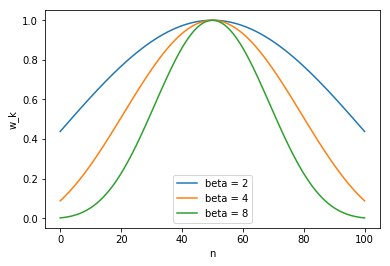

In [5]:
generate_kaiser_windows([2, 4, 8])

In [6]:
def smooth_signal(signal, kaiser_window_parameter = 8, window_len = 10):
    # convolves kernel over the signal to smoothen it
    # returns a filtered version of kernel 
    append_top = signal[window_len -1 : 0 : -1]
    append_bottom = signal[-1: -window_len: -1]
    sig = np.r_[append_top, signal, append_bottom]
    kaiser_window = np.kaiser(window_len, kaiser_window_parameter)
    scaled_kaiser_window = kaiser_window/kaiser_window.sum()
    #valid tells us not to do any additional padding 
    smoothed = np.convolve(scaled_kaiser_window, sig, mode = "valid")
    return smoothed[5:len(smoothed)-5]

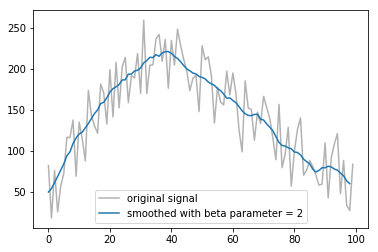

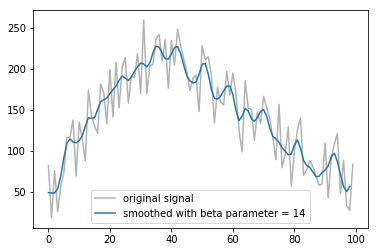

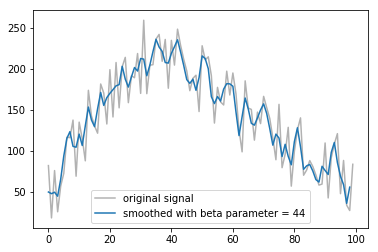

In [14]:
# create a random signal 
signal = np.random.random(100) * 100
for i in range(signal.shape[0]):
    signal[i] = signal[i] + i**( (150 - i) / 80.0)
pylab.figure(1)
y = signal
beta_param_values = [2, 14, 44]
for beta in beta_param_values:
    smoothed_signal = smooth_signal(signal, beta)
    pylab.plot(y, '-k', label = "original signal", alpha = 0.3)
    pylab.plot(smoothed_signal, label = "smoothed with beta parameter = " + str(beta))
    pylab.legend()
    pylab.show()


In [61]:
print np.kaiser(10,0)/sum(np.kaiser(10, 0))

[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
